# Load the dataset

In [1]:
import pandas as pd
df = pd.read_csv("triage.csv")
df.head()

Unnamed: 0  age  bloodp1  bloodp2  pulse  breath  bodytemp  emve  emvm  \
0           0   70      211      106     82      20        36     4     6   
1           1   89      132       76    125      20        38     4     6   
2           2   65      165       71     70      18        36     4     6   
3           3   95      128       65     83      20        36     4     6   
4           4   67      152       87     80      18        37     4     6   

   emvv  ...  全身無力  意識昏迷  食慾不振  低血糖  昏厥  heart disease  Cancer disease  \
0     5  ...     0     0     0    0   0              0               0   
1     5  ...     0     0     0    0   0              0               0   
2     5  ...     0     0     0    0   0              0               0   
3     5  ...     0     0     0    0   0              0               0   
4     5  ...     0     0     0    0   0              0               0   

   renal disease  liver disease  triage  
0              0              0       2  
1              0              0       2  
2              0              0       4  
3              0              0       2  
4              0              0       4  

[5 rows x 46 columns]

In [2]:
print(df.shape, df.columns)

target = ['triage']
feature_bins = df.columns[:-1]
print(feature_bins)
print(len(feature_bins))
print(len(df.columns))

data_input = df[feature_bins]
data_output = df[target].to_numpy().ravel()
print(data_input.shape, data_output.shape)

(12335, 46) Index(['Unnamed: 0', 'age', 'bloodp1', 'bloodp2', 'pulse', 'breath',
       'bodytemp', 'emve', 'emvm', 'emvv', 'referral', '代訴', '呼吸短促', '意識不清',
       '發燒', '發現症狀時間 2022', '無力', '咳嗽', '頭暈', '胸痛', '全身', '嘔吐', '腹痛', '胸悶',
       '癲癇', '心悸', '右側', '口齒不清', '交通事故', '痙攣', '左側', '單側無力', '血壓低', '腹瀉', '上肢',
       '下肢', '全身無力', '意識昏迷', '食慾不振', '低血糖', '昏厥', 'heart disease',
       'Cancer disease', 'renal disease', 'liver disease', 'triage'],
      dtype='object')
Index(['Unnamed: 0', 'age', 'bloodp1', 'bloodp2', 'pulse', 'breath',
       'bodytemp', 'emve', 'emvm', 'emvv', 'referral', '代訴', '呼吸短促', '意識不清',
       '發燒', '發現症狀時間 2022', '無力', '咳嗽', '頭暈', '胸痛', '全身', '嘔吐', '腹痛', '胸悶',
       '癲癇', '心悸', '右側', '口齒不清', '交通事故', '痙攣', '左側', '單側無力', '血壓低', '腹瀉', '上肢',
       '下肢', '全身無力', '意識昏迷', '食慾不振', '低血糖', '昏厥', 'heart disease',
       'Cancer disease', 'renal disease', 'liver disease'],
      dtype='object')
45
46
(12335, 45) (12335,)


# feature_importance_ for Random Forest Classifier
- If we want to know for all the models we can try it individually or by forloop

In [3]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.2, random_state=42)


model = DecisionTreeClassifier()
mdl=model.fit(x_train, y_train)
#y_pred = model.predict(data_input)
importances = mdl.feature_importances_
for name, importance in zip(data_input.columns, mdl.feature_importances_):
    print(name, importance)
print(importances)
#std = np.std([t.feautre_importances_ for t in model.estimators_], axis = 0)

#indices = np.argsort(importances)[::-1]

#print('Feature Ranking:')

#for f in range(X.shape[1]):
#	print('%d. features %d (%f)'% (f+1, indices[f], importances[indices[f]]))

Unnamed: 0 0.14496488290241652
age 0.22028413753737128
bloodp1 0.13558074695700095
bloodp2 0.07702195373831972
pulse 0.10801266595806018
breath 0.05373624273910931
bodytemp 0.03744129114780305
emve 0.01794553390114174
emvm 0.02393303564237118
emvv 0.004581281857921245
referral 0.012551495522994024
代訴 0.014085989897376272
呼吸短促 0.008952069927088364
意識不清 0.00318563833355516
發燒 0.006814645305291304
發現症狀時間 2022 0.0031552247822527932
無力 0.0037219422743559128
咳嗽 0.005585679090116216
頭暈 0.0075539284443973094
胸痛 0.008122889087434134
全身 0.0031836989486396035
嘔吐 0.0059506145328966685
腹痛 0.016711632769137376
胸悶 0.0053560199712900285
癲癇 0.0008028580943391351
心悸 0.0029980177269556775
右側 0.007322442974732965
口齒不清 0.0002743406231700713
交通事故 0.007634905953872301
痙攣 0.0004229901070686475
左側 0.011057528834144459
單側無力 0.0
血壓低 0.00017183973099663802
腹瀉 0.001406437488232689
上肢 0.005505160460753826
下肢 0.007590745793110694
全身無力 0.0008019187446509777
意識昏迷 0.0002638967297448369
食慾不振 0.0005526503849708189
低血糖 0.

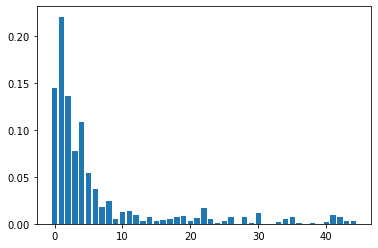

In [4]:
from matplotlib import pyplot
pyplot.bar(range(len(mdl.feature_importances_)), mdl.feature_importances_)
pyplot.show()

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 33145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30171 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 33145 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 30171 missing from current font.
  font.set_text(s, 0, flags=flags)


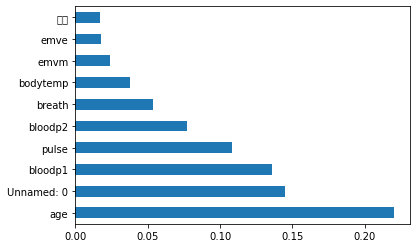

In [5]:
#plot graph of feature importances for better visualization
import matplotlib.pyplot as plt
feat_importances = pd.Series(mdl.feature_importances_, index=data_input.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# permutation based feature importance

In [6]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(mdl, x_test, y_test)
perm_importance

{'importances_mean': array([ 2.25374949e-02,  8.03404945e-02,  8.95824889e-02,  2.33481962e-02,
         3.69679773e-02,  2.52128091e-02,  1.32144305e-02,  1.13498176e-03,
         5.91811917e-03,  1.37819214e-03,  3.48601540e-03,  3.24280503e-02,
         2.67531415e-03,  2.10782327e-03,  6.40453993e-03,  5.67490880e-04,
         9.72841508e-04,  7.29631131e-04,  8.51236319e-03,  5.35062829e-03,
         3.24280503e-04,  3.89136603e-03,  1.40251317e-02,  2.75638427e-03,
        -4.05350628e-04,  8.91771382e-04,  1.70247264e-03,  0.00000000e+00,
         4.70206729e-03,  0.00000000e+00, -6.48561005e-04,  0.00000000e+00,
         0.00000000e+00,  4.86420754e-04, -8.10701257e-05,  2.67531415e-03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.29712201e-03,  2.43210377e-04,  2.83745440e-03, -6.48561005e-04,
         1.21605188e-03]),
 'importances_std': array([0.00159278, 0.00150363, 0.00438079, 0.0042714 , 0.00557795,
        0.00587073, 0.00129712

Text(0.5, 0, 'Permutation Importance')

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24038 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20596 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32930 missing from current font.
  font.set_

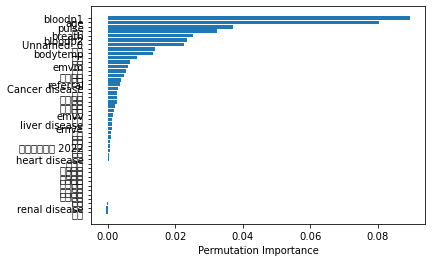

In [7]:
sorted_idx = perm_importance.importances_mean.argsort()
#feat_importances = data_input.columns[sorted_idx], perm_importance.importances_mean[sorted_idx]
#feat_importances.nlargest(10).plot(kind='barh')
plt.barh(data_input.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# Feature importance by Shap values
- pip install shap

In [ ]:
import shap
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(x_test)

In [ ]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, x_test)

# Analysis of the model
- Confusion matrix
- AUC-ROC curves

In [10]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   1.000
[[ 678    0    0    0    0]
 [   0 2353    0    0    0]
 [   0    0 7361    0    0]
 [   0    0    0 1083    0]
 [   0    0    0    0  860]]
Confusion matrix, without normalization


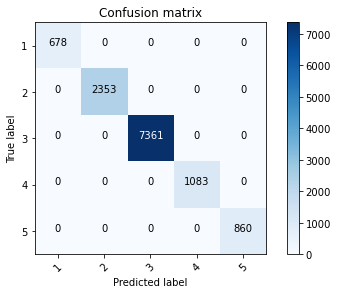

In [11]:
from sklearn import metrics
import itertools
import numpy as np

score = metrics.accuracy_score(data_output, y_pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(data_output, y_pred)
print(cm)
plot_confusion_matrix(cm, classes=['1', '2', '3', '4', '5'])

In [12]:
from sklearn.metrics import classification_report
target_names = ['1', '2', '3', '4', '5']
print(classification_report(data_output, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       678
           2       1.00      1.00      1.00      2353
           3       1.00      1.00      1.00      7361
           4       1.00      1.00      1.00      1083
           5       1.00      1.00      1.00       860

    accuracy                           1.00     12335
   macro avg       1.00      1.00      1.00     12335
weighted avg       1.00      1.00      1.00     12335



[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:998: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


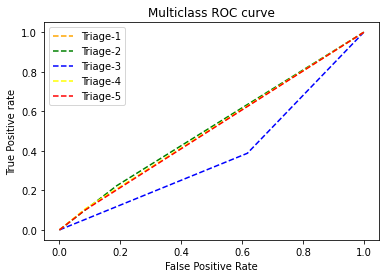

In [13]:
#train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.3, random_state=143)

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier

#train the model
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

#predicting the data
y_pred_cnb = model.predict(X_test)
y_prob_pred_cnb = model.predict_proba(X_test)

#roc auc score
roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')
print(y_prob_pred_cnb)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Triage-1')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Triage-2')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Triage-3')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Triage-4')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Triage-5')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Decision Tree Classifier ROC',dpi=300);    